In [1]:
# !jupyter nbconvert --to slides week3.ipynb --post serve
# http://127.0.0.1:8000/week3.slides.html?print-pdf

<p style="text-align: center; font-size: 192%"> Computational Finance </p>
<img src="img/ABSlogo.svg" alt="LOGO" style="display:block; margin-left: auto; margin-right: auto; width: 90%;">
<p style="text-align: center; font-size: 150%"> Week 3: Risk Management; Plotting </p>
<p style="text-align: center; font-size: 75%"> <a href="#copyrightslide">Copyright</a> </p>

In [2]:
#silence some warnings
import warnings
warnings.filterwarnings('ignore')

# Last week: Dealing with Data

* `Numpy`'s `ndarray`s are a sequence type with mutable homogenous elements. 
    * ufuncs and broadcasting allow us to vectorize code, such that the code is more efficient.
* The `pandas` package introduces `Series` and `DataFrames`. 
    * It is useful for analyzing panel data, and in particular time series. 
    * It has effective tools to manipulate the data.
* Directly communicate with online databases to load (financial) data using `pandas-datareader`.
* Functionality for regression analysis is stored in the `statsmodels` package.

# This week: Risk Management; Plotting

* Plotting Basics
* Risk Measures
    * Value at Risk
    * Asset Returns: Stylized Facts
    * Nonparametric Methods
    * Parametric Methods
    * Backtesting
    
    
* **Assignment 1 deadline**: Sunday 21 November at 23:59

# Plotting Basics
* Plotting in (scientific) Python is mostly done via the `matplotlib` library ([user guide](https://matplotlib.org/users/index.html)), which is inspired by the plotting facilities of Matlab&reg;.
* Its main plotting facilities reside in its `pyplot` module. It is usually imported as

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

* The line `%matplotlib inline` is an [ipython magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html). It makes plots appear inline in the notebook.
* The `seaborn` library ([user guide](https://seaborn.pydata.org/tutorial.html)) provides higher-level statistical visualizations:

In [2]:
import seaborn as sns

* Finally, `statsmodels` is useful for QQ plots (see below):

In [3]:
import statsmodels.api as sm

* I will only give a brief introduction to matplotlib here. However, the code for all graphs shown below is included in the notebook (though sometimes hidden in slide mode), and should be studied.
* The fundamental object in matplotlib is a `figure`, inside of which reside `subplots` (or `axes`).
* To create a new figure, add an axis, and plot to it:

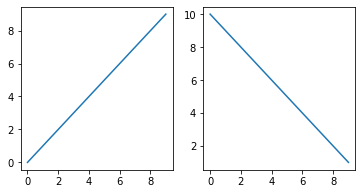

In [4]:
#With the inline backend, these need to be in the same cell.
fig = plt.figure(figsize=(6,3))  #Create a new empty figure object. Size is optional.
ax1 = fig.add_subplot(121)  #Layout: (1x2) axes. Add one in row 1, column 1, and make it current (what plt.* commands operate on).
ax2 = fig.add_subplot(122)  #Add an axes in row 1, column 2, and make it current. 
ax1.plot(range(10))
ax2.plot(range(10, 0, -1));

* By default, matplotlib plots into the current axis, creating one (and a figure) if needed. Using the convenience method `subplot`, this allows us to achieve the same without explicit reference to figures and axes:

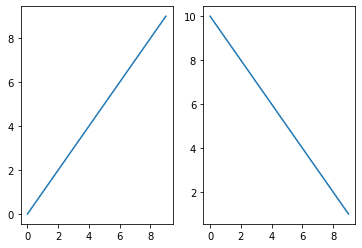

In [5]:
plt.subplot(121)
plt.plot(range(10))
plt.subplot(122)
plt.plot(range(10, 0, -1));

* To plot two vectors $x$ and $y$ against each other:

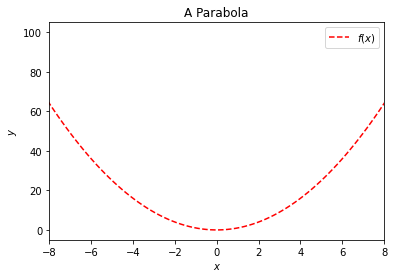

In [6]:
import numpy as np
x = np.linspace(-10, 10, 100)
y = x**2
plt.plot(x,y,'r--')  #Dashed red line; see table on p. 114.
plt.xlabel('$x$')  #LaTeX equations can be included by enclosing in $$.
plt.ylabel('$y$')  #Use r'text' if you want to add symbols, e.g. use r'$\beta$' to print the Greek letter beta
plt.title('A Parabola')
plt.legend(['$f(x)$'])  #Expects a list of strings.
plt.xlim(xmin=-8, xmax=8);  #Axis limits.
plt.savefig('filename.svg')  #Save the plot to disk.

# Risk Measures
## Introduction
* The Basel Accords mandate that financial institutions report the risk associated with their positions, so that regulators may check the adequacy of the economic capital as a buffer against market risk.
* Reporting is in the form of a *risk measure*, which condenses the risk of a position into a single number.
* Currently, the mandated measure is *Value at Risk* (VaR), but there are debates of replacing it with an alternative (*Expected Shortfall*). 
    * Implementation is not until 1 January 2023 though, see [Basel's market risk framework](https://www.bis.org/bcbs/publ/d457.htm) and [recent deferral](https://www.bis.org/press/p200327.htm).
* Banks are allowed to use their own, internal models for the computation of VaR, but the adequacy of these models should be *backtested*.


## Value at Risk
* Consider a portfolio with value $V_{t}$ and daily (simple) return $R_{t}$.
* Define the one-day loss on the portfolio as

$$
\$Loss_{t+1}=-\left[V_{t+1}-V_{t}\right].
$$

* I will distinguish between the dollar Value at Risk (an amount) and the return Value at Risk (a percentage). When unqualified, I mean the latter.
* The one-day $100p\%$ dollar Value at Risk
$\$VaR_{t+1}^{p}$ is the loss on the portfolio that we are $100\left(1-p\right) \%$ confident will not be exceeded. The Basel committee prescribes $p=0.01$.

* The *return Value at risk* $VaR_{t+1}^{p}$ expresses
$\$VaR_{t+1}^{p}$
as a percentage of the portfolio value:

$$
VaR_{t+1}^{p}=\frac{\$VaR_{t+1}^{p}}{V_{t}}.
$$
* Hence
$$
\Pr (R_{t+1}<-VaR_{t+1}^{p})=p,
$$
because
$$
R_{t+1}=-\frac{\$Loss_{t+1}}{V_{t}}.
$$
This holds approximately for log returns, too.

* Thus $VaR_{t+1}^{p}$ is minus the $100p$th *percentile* (or minus the $p$th *quantile*) of the return distribution.

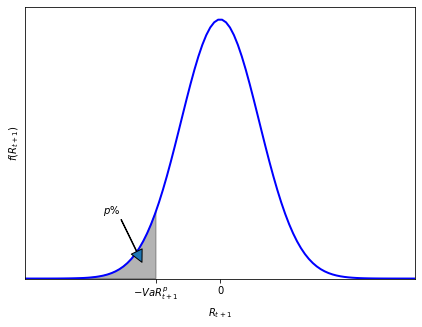

In [7]:
from matplotlib.patches import Polygon
import scipy.stats as stats  #The book likes to import it as `scs`.
a, b, c = -5, 5, stats.norm.ppf(0.05)
x = np.linspace(a, b, 100)
y = stats.norm.pdf(x)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)
plt.xlim(xmin=a, xmax=b)
Ix = np.linspace(a, c)
Iy = stats.norm.pdf(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(c, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
ax.annotate('$p\%$', xy=(-2, 0.025), xytext=(-3, 0.1),
            arrowprops=dict(width=.5),
            )
plt.xlabel('$R_{t+1}$')
plt.ylabel('$f(R_{t+1})$')
ax.set_xticks([c, 0])
ax.set_xticklabels(['$-VaR_{t+1}^p$', '0'])
ax.set_yticks([])
plt.show()

<img src="img/var.svg" alt="VaR" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

## Asset Returns: Stylized Facts
* Stylized facts about asset returns include
  * Lack of autocorrelation;
  * Leverage effects;
  * Heavy tails of return distribution;
  * Volatility clustering.
  
* These need to be taken into account when creating VaR forecasts. 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


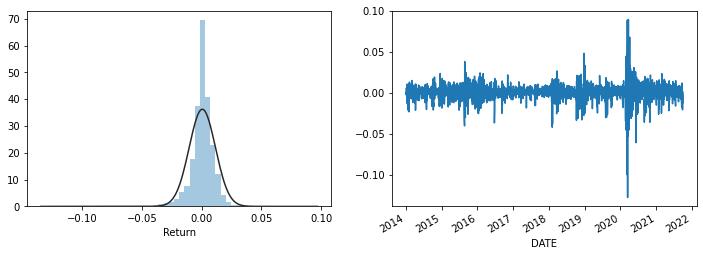

In [8]:
import pandas as pd
import pandas_datareader.data as web
import scipy.stats as stats  #The book likes to import it as `scs`.
p = web.DataReader('SP500', 'fred', start='1/1/2014', end='30/09/2021')['SP500']  #S&P500 from St. Louis Fed (pulls Adj. Close)
p = p.dropna() # Drop missing values, FRED reports all days, including non-trading days such as holidays
r = np.log(p) - np.log(p).shift(1)
r.name = 'Return'
r = r[1:]  #Remove the first observation (NaN).
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.distplot(r, kde=False, fit=stats.norm)  #Histogram overlaid with a fitted normal density.
plt.subplot(122)
r.plot()  #Note that this is a pandas method! It looks prettier than plt.plot(r).
# Note that r is a Series. We need to specify the axes if you want a DataFrame to be plotted in a particular subplot.
plt.show()

<img src="img/stylizedfacts.svg" alt="Stylized Facts" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

## VaR Methods
### Non-parametric: Historical Simulation

* Historical simulation assumes that the distribution of tomorrow's portfolio
return is well approximated by the empirical distribution (histogram) of
the past $N$ observations $\left\{
R_{t}, R_{t-1},\ldots, R_{t+1-N}\right\} $.

* This is as if we draw, with replacement, from the last $N$ returns and use
this to simulate the next day's return distribution.

* The estimator of VaR is given by minus the $p$th *sample quantile* of the last $N$ portfolio returns, i.e., $\widehat{VaR}_{t+1}^{p}=-R^N_{p}$, where $R^N_{p}$ is the smallest number such that at least $100p\%$ of the observations are smaller than or equal to it.


* In Python, we can use NumPy's `quantile` method, or the `percentile` function (or `nanpercentile` which ignores `NaN`s).

In [9]:
VaR_hist = -r.quantile(.01)  #Alternatively, VaR=-np.percentile(r,1).
VaR_hist

0.032640043535360506

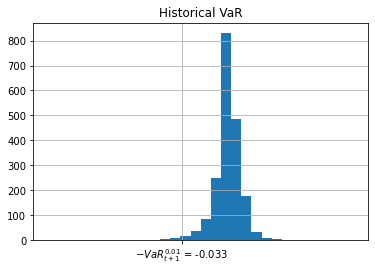

In [10]:
ax = r.hist(bins=30)  #Another pandas method: histogram with 30 bins.
ax.set_xticks([-VaR_hist])
ax.set_xticklabels(['$-VaR_{t+1}^{0.01}$ = -%4.3f' %VaR_hist])  #4.3f means floating point with 4 digits, of which 3 decimals.
plt.title('Historical VaR')
plt.show()

<img src="img/var_hist.svg" alt="VaR_hist" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

* Problem: Last year(s) of data are not necessarily representative for the next few days (because of, e.g., volatility clustering).
* Exacerbated by the fact that a large $N$ is required to compute the 1% VaR with any degree of precision (only 1% of the data are really used). <br><br>
* With SciPy's `gaussian_kde()` (*Kernel Density Estimation*) one can estimate the historical distribution of returns and use the returned callable object as a pdf in order to sample from it.
* That is, if one deems the distribution of historical returns representative one may overcome a small $N$ limitation by fitting and subsequently sampling from the estimated *pdf*.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


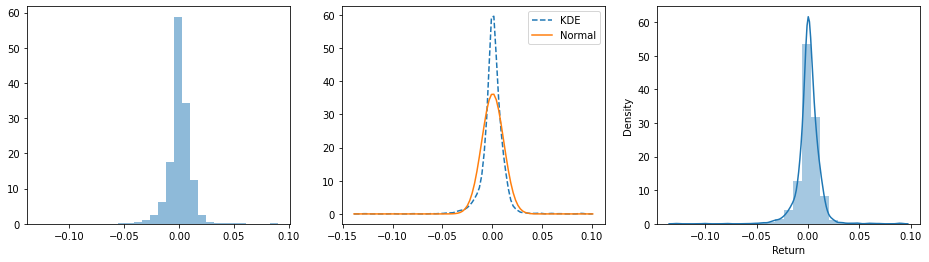

In [11]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(r)  #estimate the kernel density - with 'bw_method=' different bandwidth can be choosen
x = np.linspace(r.min()-r.std(),r.max()+r.std(), 100)
fig, axes = plt.subplots(1, 3, figsize=(16,4))
axes[0].hist(r, density=True, alpha=0.5, bins=30)
axes[1].plot(x, kde(x), label="KDE", linestyle="--")
axes[1].plot(x, stats.norm.pdf(x,r.mean(),r.std()), label="Normal")
axes[1].legend()
sns.distplot(r, bins=25, ax=axes[2])
plt.show()

<img src="img/var_sim.svg" alt="VaR_sim" style="display:block; margin-left: auto; margin-right: auto; width: 100%;">

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using scott for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future

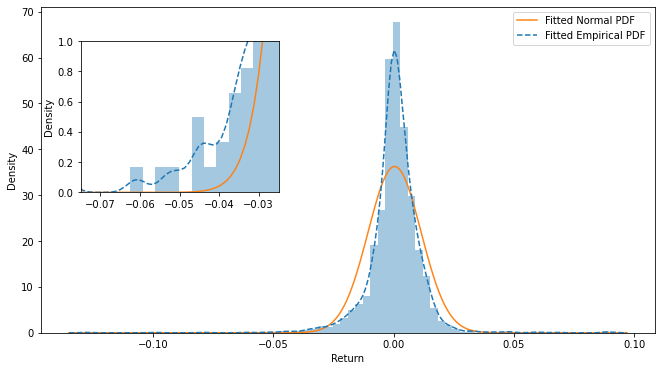

In [12]:
rr = np.ravel(r)  # auxilliary vector
#Histogram
plt.figure(num=1, figsize=(11, 6))
sns.distplot(r, bins=70, kde=False, fit=stats.norm, fit_kws={"color": "tab:orange", "alpha": .95, "label": "Fitted Normal PDF"})
sns.kdeplot(rr, kernel='gau', bw='scott', color='tab:blue', label="Fitted Empirical PDF", linestyle="--")
plt.legend(loc="best")
#Inset
a = plt.axes([.175, .45, .25, .35])
sns.distplot(r, bins=70, kde=False, fit=stats.norm, fit_kws={"color": "tab:orange", "alpha": .95, "label": "Fitted Normal PDF"}, axlabel=False)
sns.kdeplot(rr, kernel='gau', bw='scott', color='tab:blue', label="Fitted Empirical PDF", linestyle="--")
plt.xlim([-0.075, -0.025])
plt.ylim([0, 1])
plt.show()

<img src="img/var_tail.svg" alt="VaR_tail" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

* Using the KDE, one can randomly sample new data from the estimated pdf using `resample()`
* Large $N$ to compute the 1% VaR precisely is less problematic (e.g., 10,000 observations correspond to roughly 40 years of simulated daily data) 
  * However, the problem that the fitted historial distribution might not be representative remains a strong concern!

In [13]:
kde_sim_r = kde.resample(10000)  #'resample()' takes the number of desired datapoints as argument
VaR_hist_sim = -np.percentile(kde_sim_r,1)
VaR_hist_sim

0.03249799384705123

### Parametric: Normal and $t$ Distributions
* Another simple approach is to
assume $R_{t+1}\sim N(\mu ,\sigma ^{2})$, and to estimate $\mu $
and $\sigma ^{2}$ from historical data (for daily data, $\mu \approx 0$). With $\Phi (z)$ denoting the distribution function of the standard normal, the VaR is then determined from

\begin{align*}
\Pr \left( R_{t+1}<-VaR_{t+1}^{p}\right) &=\Pr \left( \frac{R_{t+1}-\mu }{
\sigma }<\frac{-VaR_{t+1}^{p}-\mu }{\sigma }\right) \\
&=\Pr \left( z_{t+1}<\frac{-VaR_{t+1}^{p}-\mu }{\sigma }\right) \\
&=\Phi \left( \frac{-VaR_{t+1}^{p}-\mu }{\sigma }\right) =p.
\end{align*}

* Thus, with $\Phi ^{-1}(p)$ denoting the inverse distribution function of the standard normal, 
<br><br>
$$
VaR_{t+1}^{p}=-\mu -\sigma \Phi^{-1}(p).
$$
<br>
* Python calls $\Phi ^{-1}(p)$ the *percentage point function* (ppf):

In [14]:
mu, sig = stats.norm.fit(r)  #fitting a normal distribution to `r` returns mean and standard deviation
VaR_norm = - mu - sig*stats.norm.ppf(0.01)
VaR_norm, mu, sig

(0.025139310371294816, 0.0004384459622276396, 0.010994811489261137)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


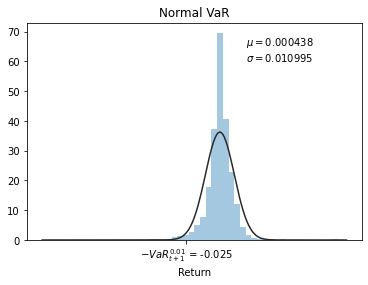

In [15]:
ax = sns.distplot(r, kde=False, fit=stats.norm)  #histogram overlaid with a fitted normal density.
ax.set_xticks([-VaR_norm])
ax.set_xticklabels(['$-VaR_{t+1}^{0.01}$ = -%4.3f' %VaR_norm])
ax.text(0.02,60,'$\mu=%7.6f$\n$\sigma=%7.6f$' %(mu, sig))  #\n means newline.
plt.title('Normal VaR')
plt.show()

<img src="img/var_norm.svg" alt="VaR_norm" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

* Problems:
  * The variance of the past year(s) of data is not necessarily representative for the future.
  * Returns typically have heavier tails than the normal.
* The solution to the second point is to use another distribution. The Student's $t$ distribution is a popular choice.

* The Student's $t$ distribution with $\nu$ degrees of freedom, $t_\nu$, is well known from linear regression
as the distribution of $t$-statistics.
  * In that context, $\nu=T-k$, where $T$ is sample size and $k$ the number of regressors.

* It can be generalized to allow $\nu\in\mathbb{R}_+$.

* Smaller values of $\nu$ correspond to heavier tails. As $\nu\rightarrow \infty $, we approach the $N(0,1)$ distribution.

* It only has moments up to but not including $\nu$:
  * The mean is finite and equal to zero if $\nu>1$.
  * The variance is finite and equal to $\nu/(\nu-2)$ if $\nu>2$.
  * The excess kurtosis is finite and equal to $6/(\nu-4)$ if $\nu>4$.

* The distributions are symmetric around $0$, so the mean and skewness are $0$ if they exist.


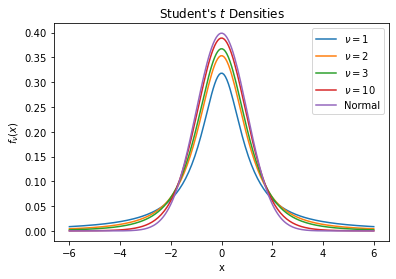

In [16]:
x = np.linspace(-6, 6, 200)
df=[1, 2, 3, 10]
for nu in df:
    plt.plot(x, stats.t.pdf(x, nu))
legend = ['$\\nu=%1.0f$' % nu for nu in df]  #Double escaping: \\nu, not \nu, because \n is newline.
plt.plot(x, stats.norm.pdf(x))
legend.append('Normal')
plt.legend(legend)
plt.title("Student's $t$ Densities")
plt.xlabel('x')
plt.ylabel('$f_{\\nu}(x)$')
plt.show()

<img src="img/tdists.svg" alt="t distributions" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

* For financial applications, we need to allow for a non-zero mean, and a variance different from $\nu/(\nu-2)$.
* This is achieved by introducing a *location parameter* $m$ and a *scale parameter* $h$. We'll write $f_\nu(x;m,h)$ for the resulting density, $F_\nu(x;m,h)$ for the distribution function, and $F^{-1}_\nu(p;m,h)$ for the percentage point function.
* Note that if $x\sim t_\nu(m,h)$, $\nu>2$, then $\mathbb{E}[x]=m$ and $\mathrm{var}[x]=h^2\nu/(\nu-2)$.
* The VaR becomes
\begin{equation*}
VaR_{t+1}^{p}=-F^{-1}_\nu(p; m, h)=-m-hF^{-1}_\nu(p; 0, 1).
\end{equation*}
* In Python:

In [17]:
df, m, h = stats.t.fit(r)  #fit a location-scale t distribution to r
VaR_t = -stats.t.ppf(0.01, df, loc=m, scale=h) #or -m-h*stats.t.ppf(0.01, df, loc=0, scale=1)
VaR_t, m, h, df

(0.03091297122404388,
 0.0008822247288963491,
 0.005488089313027696,
 2.321293817672602)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


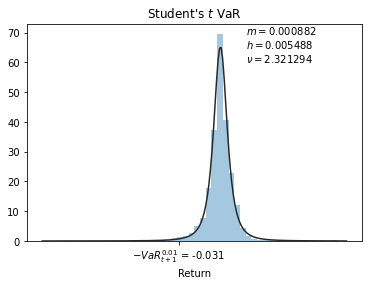

In [18]:
ax = sns.distplot(r, kde=False, fit=stats.t)  #Histogram overlaid with a fitted t density.
ax.set_xticks([-VaR_t])
ax.set_xticklabels(['$-VaR_{t+1}^{0.01}$ = -%4.3f' %VaR_t])
ax.text(0.02,60,'$m=%7.6f$\n$h=%7.6f$\n$\\nu=%7.6f$' %(m, h, df))
plt.title("Student's $t$ VaR")
plt.show()

<img src="img/var_t.svg" alt="VaR_t" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

* There are several ways to assess whether a distributional assumption is adequate.
* One is to use a *goodness of fit test*. Many such tests exist.
* Hilpisch discusses the D'Agostino-Pearson test, available as `stats.normaltest`.
* Here we use the Jarque-Bera test. The test statistic is
$$
JB=N\left(S^2/6+(K-3)^2/24\right),
$$
where $N$ is the sample size, and $S$ and $K$ are respectively the sample skewness and kurtosis.
* Intuitively, it tests that the skewness and excess kurtosis are zero.
* It is distributed as $\chi^2_2$ under the null of normality. The 5% critical value is 

In [19]:
stats.chi2.ppf(0.95, 2)

5.991464547107979

* In Python:

In [20]:
stats.jarque_bera(r)  #returns (JB test statistic, p-val).

Jarque_beraResult(statistic=39062.219764102236, pvalue=0.0)

* Another option is to use a QQ-plot (quantile-quantile plot).
* It plots the empirical quantiles against the quantiles of a hypothesized distribution, e.g. $\Phi^{-1}(p)$ for the normal.
* If the distributional assumption is correct, then the plot should trace out the 45 degree line.
* Points below (above) the 45 degree line in the left (right) tail indicate heavy tails.

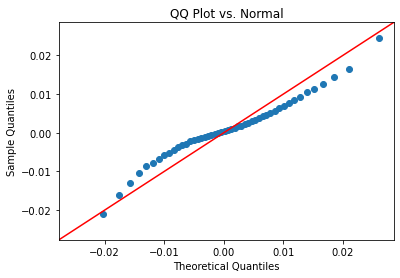

In [21]:
#This is the manual way to do it.
fig = plt.figure() 
ax = fig.add_subplot(111)
x = np.linspace(.01,.99)
emp = r.quantile(x)
mu, sig = stats.norm.fit(r)
theo = stats.norm.ppf(x, mu, sig)
ax.plot(theo, emp.values, 'o')
ax.set_ylim(ax.get_xlim())  #Make sure the axis limits are the same.
ax.plot([0, 1], [0, 1], 'r', transform=ax.transAxes)  #Add a 45 degree line.
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot vs. Normal')
plt.show()

<img src="img/qq_norm.svg" alt="QQ Plot" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

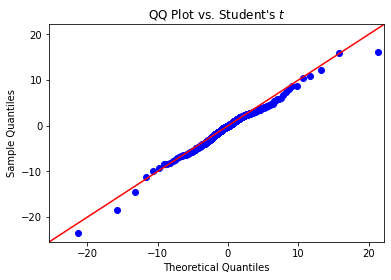

In [22]:
#this is a bit simpler.
sm.qqplot(r, dist=stats.t, fit=True, line='45')
plt.title("QQ Plot vs. Student's $t$")
plt.show()

<img src="img/qq_t.svg" alt="QQ Plot" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

### Comparison

* Most accurate method depends on the validity of the assumptions.
* The resulting estimates for the VaR *can* differ quite a bit across the methods:

In [23]:
meth = ['Historical', 'KDE', 'Normal', 'Student\'s t']
VaRlist = [VaR_hist, VaR_hist_sim, VaR_norm, VaR_t]

# Print table
print('%12s %10s' % ('Method','VaR'))
for i in range(len(VaRlist)):
    print('%12s %10.3f' % (meth[i],VaRlist[i]))

      Method        VaR
  Historical      0.033
         KDE      0.032
      Normal      0.025
 Student's t      0.031


### Time-varying Volatility

* All methods discussed so far share one drawback: they assume that the volatility is constant, at least in the estimation (and forecast) period. 
* Implicitly, the Normal and Student's $t$ method use the *historical volatility*: 
$$
\sigma _{t+1,HIST}^{2}=\frac{1}{N}\sum_{j=0}^{N-1}R_{t-j}^{2}.
$$
(Note: volatility usually means standard deviation, not variance. I'll be sloppy here).
* Here we assumed a zero mean, which is realistic for daily returns.
* Some adaptability is gained by choosing a smaller $N$ such as 250 (one trading year), but there is a tradeoff because doing so decreases the sample size.
* A general solution requires a *volatility model*, which will be discussed in *Advanced Risk Management*.

* A Pandas `Series` object has a `rolling` method that can be used to construct historial volatilities for an entire series, using, at each day, the past $N$ observations.
* The method returns a special window object that in turn has a method `var` (for variance).

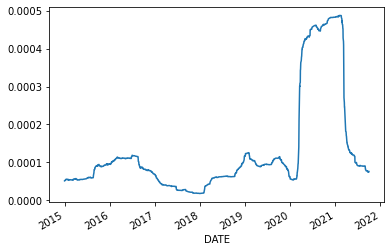

In [24]:
sig2_hist = r.rolling(window=250).var()
sig2_hist.plot();

## Backtesting
* The Basel accords require that banks' internal VaR models be *backtested*.

* They recommend constructing the 1% VaR over the last 250 trading days and counting the number of *VaR exceptions* (or violations, exceedances, hits)
  * VaR exceptions are times that losses exceeded the day's VaR figure: $-R_{t}>VaR_{t}^{p}$; or $R_{t}<-VaR_{t}^{p}$).
  
* A method is said to lie in the:

  * <font color='green'>Green</font> zone, in case of 0-4 exceptions;
  * <font color='yellow'>Yellow</font> zone, in case of 5-9 exceptions;
  * <font color='red'>Red</font> zone, in case of 10 or more exceptions.
* Being in one of the latter two incurs an extra capital charge.


* More generally, the number of exceedances should be equal to what is theoretically expected.
$$\sum_{t=0}^T (R_t < -VaR_t^p) \approx p \times T$$

* Tests are available to check statistical validity of the VaR. Beyond the scope of this course.

# Summary

* Python's **plotting** functionality is stored in the `matplotlib` library.
* **Value at Risk** is a single number that measures the risk of holding an asset or portfolio of assets.
* **Asset returns** display lack of autocorrelation, leverage effects, heavy tailed distribution, and volatility clustering.
* Both **nonparametric and parametric methods** can be used to compute the Value at Risk.
    * Nonparametric: historical simulation, KDE
    * Parametric: normal, $t$ distribution
* The methods differ by the assumptions on the return distribution; this should be tested.
* The VaR estimates should be validated by comparing the number of violations to its expected value: they should be **backtested**.


* More details in the [*Advanced Risk Management*](https://studiegids.uva.nl/xmlpages/page/2021-2022-en/search-course/course/92634) course. 

<section id="copyrightslide">

# Copyright Statement
* Course slides were created by Simon Broda for Python 2.7 $-$ Andreas Rapp adapted them to Python 3.6. Maintained and updated by Bart Keijsers.
* Week 4 slides were created by Bart Keijsers. The hierarchical indexing example is from the UvA course Data Science Methods by Cees Diks and Bram Wouters.
* All figures have been produced for this course using Python. Empirical results are based on public data available from [FRED](https://fred.stlouisfed.org/), [Quandl/WIKI](https://www.quandl.com/databases/WIKIP), [Kenneth French's website](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) and [Yahoo Finance](https://finance.yahoo.com/).
* This work is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).
* More information on Simon Broda's [Github](https://github.com/s-broda/ComputationalFinance/blob/master/LICENSE.md).